# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [3]:
import pandas as pd 
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [2]:
tips = sns.load_dataset("tips")
tips["tips_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:               tips_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.52e-06
Time:                        01:33:15   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

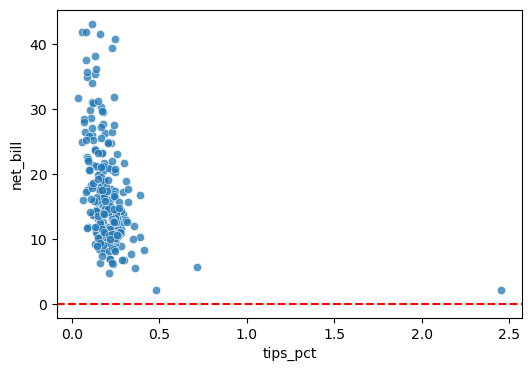

In [5]:
reg = smf.ols('tips_pct ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tips_pct', y = 'net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:               tips_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.62e-13
Time:                        01:41:29   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

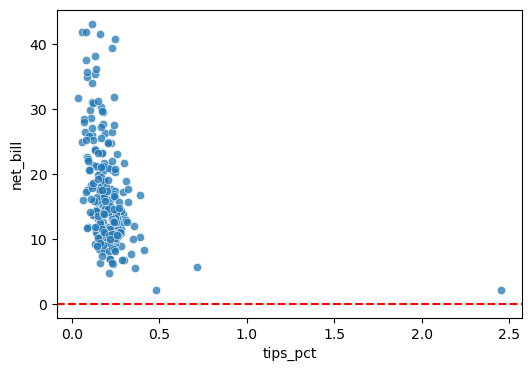

In [8]:
reg = smf.ols('tips_pct ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tips_pct', y = 'net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:               tips_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.52e-06
Time:                        01:37:48   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

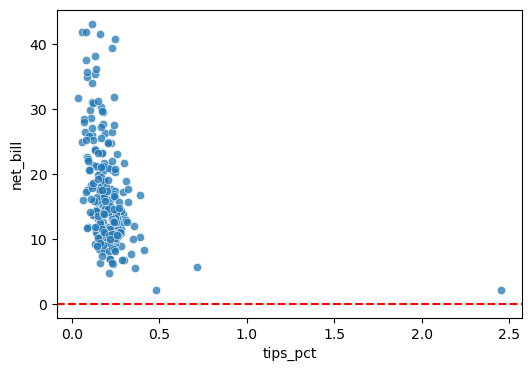

In [6]:
reg = smf.ols('tips_pct ~ net_bill', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tips_pct', y = 'net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:               tips_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.06e-09
Time:                        01:40:04   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

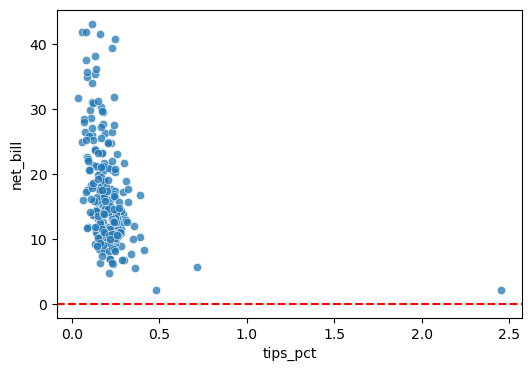

In [7]:
reg = smf.ols('tips_pct ~ net_bill + np.power(net_bill, 2)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tips_pct', y = 'net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           8.27e-16
Time:                        01:44:13   Log-Likelihood:                -821.36
No. Observations:                 244   AIC:                             1647.
Df Residuals:                     242   BIC:                             1654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2338      1.858  

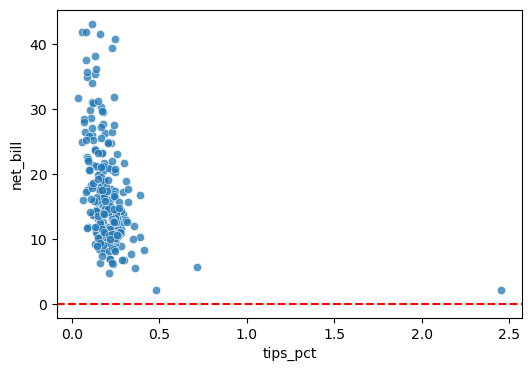

In [9]:
reg = smf.ols('net_bill ~ np.log(tips_pct)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tips_pct', y = 'net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [15]:
tips["pred"] = reg.fittedvalues

r = tips[["pred", "net_bill"]].corr().iloc[0,1]
r

0.4851235630317731

In [16]:
r**2

0.23534487140864274

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:       np.log(net_bill)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           5.20e-20
Time:                        02:23:11   Log-Likelihood:                -123.41
No. Observations:                 244   AIC:                             250.8
Df Residuals:                     242   BIC:                             257.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6771      0.106  

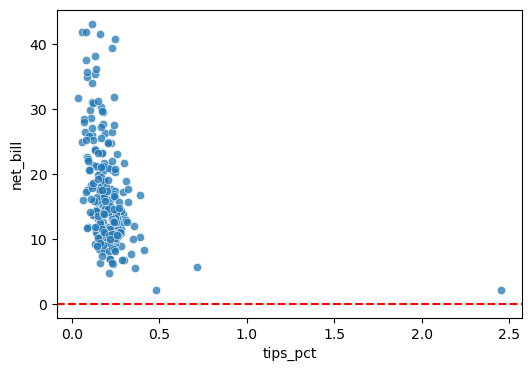

In [17]:
reg = smf.ols('np.log(net_bill) ~ np.log(tips_pct)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'tips_pct', y = 'net_bill', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [39]:
tips["pred_y"] = np.exp(reg.fittedvalues)

tips[["pred_y", "net_bill"]].corr().iloc[0,1]**2

0.24390073262020812

###  6. qual modelo resultou no melhor ajuste?

In [40]:
print("Ao meu ver o modelo que resultou no melhor ajuste foi o (modelo no log do tip_pct em função do log de net_bill), porque foi o modelo que teve o maior r_quadrado em um valor de 0.293")

Ao meu ver o modelo que resultou no melhor ajuste foi o (modelo no log do tip_pct em função do log de net_bill), porque foi o modelo que teve o maior r_quadrado em um valor de 0.293
